# Machine learning with Pytorch and Scikit-learn (Sebastian Raschka et al)

## Chapter 1: Giving Computers the Ability to Learn from Data

In this chapter, we will cover the following topics:
- The general concepts of machine learning 
- The three types of learning and basic terminology 
- The building blocks for successfully designing machine learning systems 
- Installing and setting up python for data analysis and machine learning 

## Chapter 2: Training Simple Machine Learning Algorithms For Classification 
In this chapter, we will cover the following topics:
- Buidling and understanding of machine learning algorithms 
- Using pandas, Numpy, and Matplotlib to read in, process, and visualize data 
- Implementing linear classifiers for 2-class problems in Python 

Implementing a perceptron learning algorithm in Python
### An object-oriented perceptron API

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = np.zeros(X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, encoding='utf-8')

In [7]:
y = df.iloc[0:100, 4].values

In [8]:
y = np.where(y == 'Iris-setosa', 0, 1)

In [9]:
X = df.iloc[0:100, [0, 2]].values

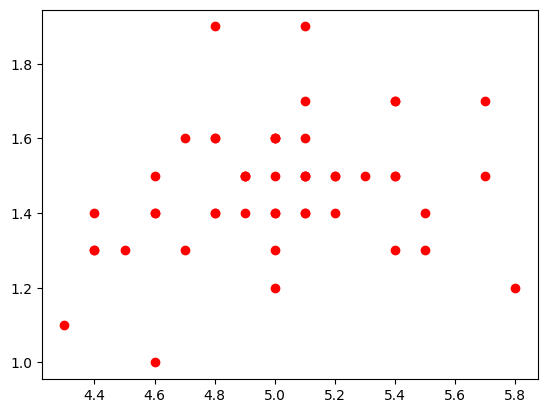

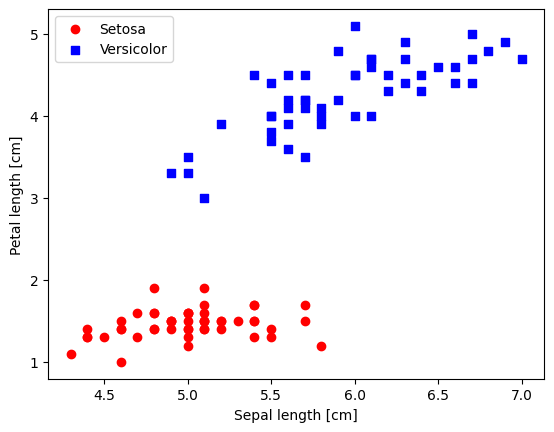

In [11]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

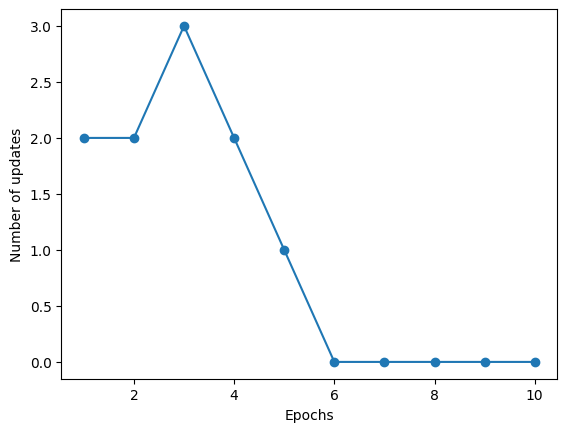

In [12]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Chapter 12: Parallelizing Neural Network Training with Pytorch 

This chapter will begin the next stage of our journey into machine learning and deep learning, and we will explore the following topics:
- How Pytorch improves training performance 
- Working with Pytorch's `Dataset` and `DataLoader` to build input pipelines and enable efficient model training
- Using the `torch.nn` module to implement common deep learning architectures convenienly
- Choosing activation functions for artificial NNs